In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers  import Dense
from keras.optimizers  import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train , y_train), (X_test, y_test) = mnist.load_data()


In [4]:
print(y_train.shape[0])
print(y_test.shape[0])

60000
10000


In [6]:
assert(X_train.shape[0]==y_train.shape[0]), "not equal , ERROR!!"
assert(X_test.shape[0]==y_test.shape[0]), "not equal , ERROR!!"
assert(X_train.shape[1:] == (28,28)), "shape error!"
assert(X_test.shape[1:] == (28,28)), "shape error!"


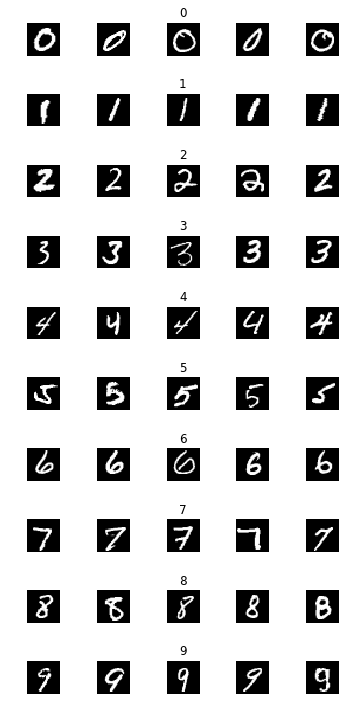

In [7]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples .append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of images')

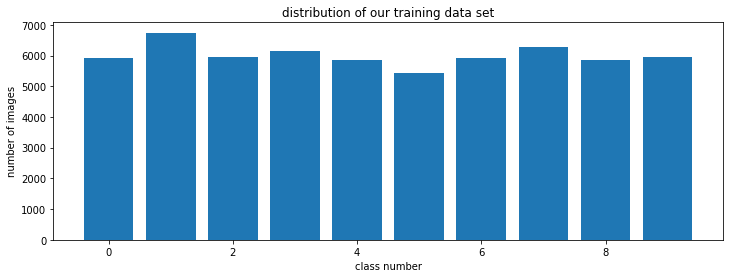

In [8]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("distribution of our training data set")
plt.xlabel("class number")
plt.ylabel("number of images")

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
num_pixels = 784
X_train  = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)

(10000, 784)


In [12]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(40 ,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 

In [13]:
model = create_model()
print(model.summary())

W0625 14:19:04.553567 11856 deprecation_wrapper.py:119] From C:\Users\Shivam\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 14:19:06.977634 11856 deprecation_wrapper.py:119] From C:\Users\Shivam\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 14:19:07.594678 11856 deprecation_wrapper.py:119] From C:\Users\Shivam\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 14:19:08.740782 11856 deprecation_wrapper.py:119] From C:\Users\Shivam\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 14:19:08.799075 11856 deprecation_wrapper.py:119] From C:\Users\Shivam

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,810
Trainable params: 8,810
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 

W0625 14:19:13.876488 11856 deprecation.py:323] From C:\Users\Shivam\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0625 14:19:14.023222 11856 deprecation_wrapper.py:119] From C:\Users\Shivam\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 169us/step - loss: 0.5907 - acc: 0.8173 - val_loss: 0.2555 - val_acc: 0.9223
Epoch 2/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.3029 - acc: 0.9106 - val_loss: 0.2275 - val_acc: 0.9373
Epoch 3/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2688 - acc: 0.9204 - val_loss: 0.2472 - val_acc: 0.9273
Epoch 4/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2557 - acc: 0.9259 - val_loss: 0.2227 - val_acc: 0.9333
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.2442 - acc: 0.9268 - val_loss: 0.2017 - val_acc: 0.9383
Epoch 6/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2354 - acc: 0.9307 - val_loss: 0.2022 - val_acc: 0.9390
Epoch 7/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2289 - acc: 0.9312 - val_loss: 0.2103 - val_acc

Text(0.5, 0, 'epoch')

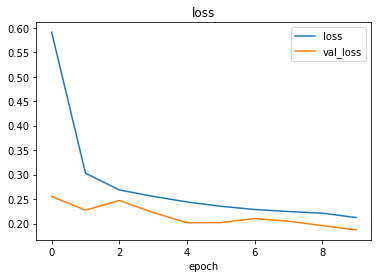

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

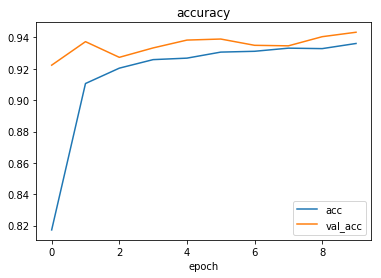

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

In [17]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('test score', score[0])
print('test accuracy', score[1])

test score 0.2323991349376738
test accuracy 0.9316


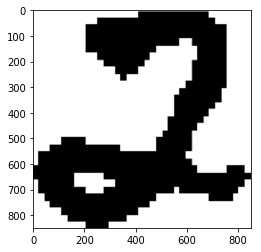

In [18]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

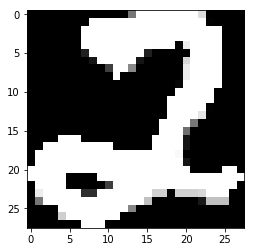

In [19]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))


In [20]:
image = image/255
image = image.reshape(1,784)



In [21]:
prediction = model.predict_classes(image)
print("predicted digit", str(prediction))

predicted digit [2]
